MLE Homework #3 Travis Johnson 662018371

#Problem 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


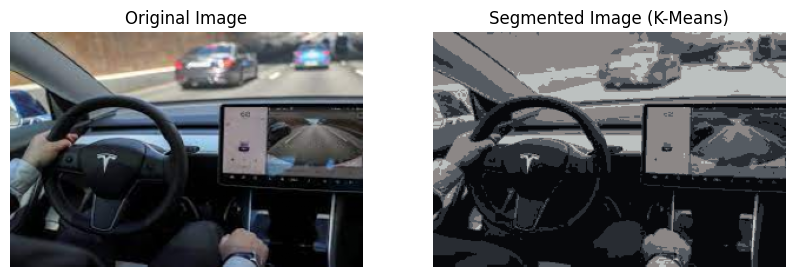

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.cluster import KMeans
from google.colab import drive


# Image
drive.mount('/content/drive')
image_path = '/content/drive/MyDrive/MLE Colab Notebooks/seg2.jpg'
image = imread(image_path)

# Resizing
image_resized = resize(image, (200, 300), anti_aliasing=True)

# Reshaping
pixels = image_resized.reshape(-1, 3)

# K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels)

segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]

segmented_image = segmented_pixels.reshape(image_resized.shape)


# Plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_resized)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image (K-Means)")
plt.axis("off")

plt.show()


# Problem 2

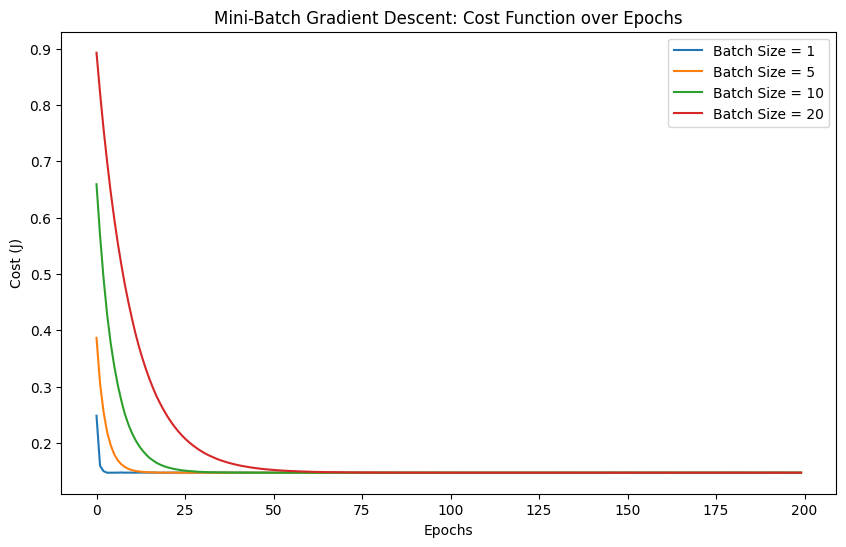

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data_path = '/content/drive/MyDrive/MLE Colab Notebooks/housing_prices.csv'
data = pd.read_csv(data_path, header=0, names=["Population", "Price"])

# Normalizing data
data["Population"] = (data["Population"] - data["Population"].mean()) / data["Population"].std()
data["Price"] = (data["Price"] - data["Price"].mean()) / data["Price"].std()

# Extracting features (X) and labels (y)
X = data["Population"].values
y = data["Price"].values

# Adding bias term
X = np.c_[np.ones(X.shape[0]), X]

# Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

# Using Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, learning_rate=0.01, epochs=1000, batch_size=10):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            gradient = (1 / len(y_batch)) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradient

        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Training the model
batch_sizes = [1, 5, 10, 20]
learning_rate = 0.01
epochs = 200


plt.figure(figsize=(10, 6))
for batch_size in batch_sizes:
    theta = np.random.randn(2)
    _, cost_history = mini_batch_gradient_descent(X, y, theta, learning_rate, epochs, batch_size)
    plt.plot(cost_history, label=f'Batch Size = {batch_size}')

plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Mini-Batch Gradient Descent: Cost Function over Epochs')
plt.legend()
plt.show()


# Problem 3

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the data
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Logistic regression model
log_reg = LogisticRegression(max_iter=10000, solver='liblinear')

# Finding top 2 features
selector = RFE(log_reg, n_features_to_select=2)
selector.fit(X_train, y_train)

# Select feature indices
selected_features = np.where(selector.support_)[0]
selected_feature_names = feature_names[selected_features]
print(f"Selected Features: {selected_feature_names}")

# Train the model
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

log_reg.fit(X_train_selected, y_train)

# Predictions
y_pred = log_reg.predict(X_test_selected)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Results
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Selected Features: ['worst radius' 'worst concavity']

Model Accuracy: 0.9298

Confusion Matrix:
[[ 54  10]
 [  2 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        64
           1       0.91      0.98      0.95       107

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



# Problem 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Price for Population 165,000: $136,673.70


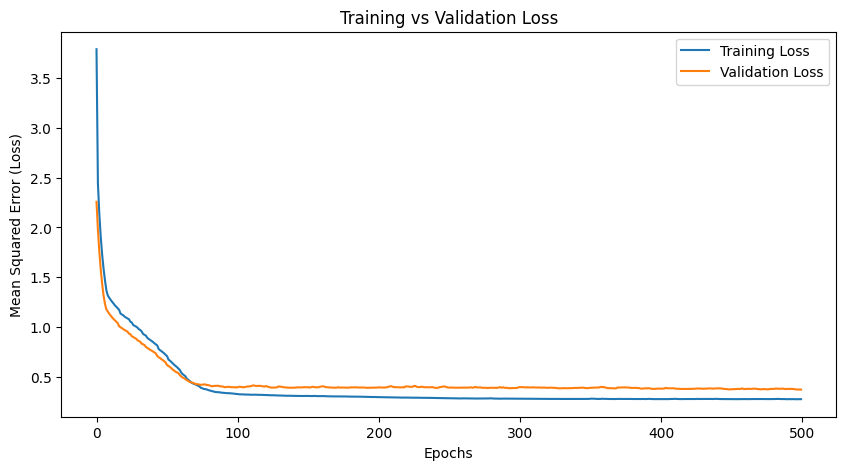

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Loading data

data_path = '/content/drive/MyDrive/MLE Colab Notebooks/housing_prices.csv'
data = pd.read_csv(data_path, header=0, names=["Population", "Price"])

# Normalizing Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[["Population"]].values)
y_scaled = scaler.fit_transform(data[["Price"]].values)

# Splitting Data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Neural Network Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compiling Model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')

# Training Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0)

# Predicting Price
population_input = np.array([[165000]])
population_scaled = scaler.transform(population_input)
predicted_price_scaled = model.predict(population_scaled)
predicted_price = scaler.inverse_transform(predicted_price_scaled)

print(f"Predicted Price for Population 165,000: ${predicted_price[0][0]:,.2f}")


# Plot & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()
